-  ## Predicción del Costo del Seguro Médico con Regresión Lineal Múltiple
    
    Eres un analista de datos en una empresa de seguros médicos. Tu objetivo es desarrollar un modelo de **Regresión Lineal Múltiple** que permita predecir el **costo del seguro médico** (`charges`) en función de varias características de los clientes, como su edad, índice de masa corporal (IMC), número de hijos y si son fumadores o no.
    
    El dataset `insurance.csv` (https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download) contiene la siguiente información:
    
    - **`age`** → Edad del cliente.
    - **`sex`** → Género (`male` o `female`).
    - **`bmi`** → Índice de masa corporal (IMC).
    - **`children`** → Número de hijos que tiene el cliente asegurado.
    - **`smoker`** → Si el cliente es fumador (`yes/no`).
    - **`region`** → Región geográfica donde reside el cliente (`northeast, northwest, southeast, southwest`).
    - **`charges`** → Costo del seguro médico (variable objetivo).
    
    Debes entrenar un modelo de **Regresión Lineal Múltiple** para predecir `charges` en función de las variables disponibles y evaluar su rendimiento con métricas como MAE, MSE y R².
    
    ### INSTRUCCIONES
    
    1. **Cargar el dataset `insurance.csv`** desde la URL [pública o Kaggle**.**](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download)
    2. **Explorar los datos y convertir las variables categóricas (`sex`, `smoker`, `region`) a variables numéricas** mediante **One-Hot Encoding**.
    3. **Seleccionar las variables predictoras (`X`) y la variable objetivo (`y`).**
    4. **Escalar las variables numéricas** utilizando `StandardScaler()`.
    5. **Dividir el dataset en conjuntos de entrenamiento (80%) y prueba (20%)** usando `train_test_split()`.
    6. **Entrenar un modelo de Regresión Lineal** con `LinearRegression()` de `sklearn`.
    7. **Obtener e interpretar los coeficientes y el intercepto del modelo.**
    8. **Realizar predicciones con el conjunto de prueba (`X_test`).**
    9. **Evaluar el modelo utilizando las métricas:**
        - **MAE (Error Absoluto Medio)**
        - **MSE (Error Cuadrático Medio)**
        - **RMSE (Raíz del Error Cuadrático Medio)**
        - **R² (Coeficiente de Determinación)**
    
    ### **PISTAS Y CONSEJOS**
    
    - Para convertir las variables categóricas a numéricas, usa `pd.get_dummies()`.
    - Al hacerlo, asegúrate de eliminar una categoría de cada variable categórica para evitar colinealidad (`drop_first=True`): `df = pd.get_dummies(df, drop_first=True)`
    - Analiza el impacto de cada variable en la predicción revisando los coeficientes del modelo.
    - Si el R² es bajo, ¿qué podrías hacer para mejorar el modelo?

In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Cargar el CSV en un dataset
df = pd.read_csv("Medical_Cost.csv")

# Mediante One-Hot encoding convertimos las variables categóricas a variables numéricas eliminando la columna origen en el proceso mediante el parámetro 'drop_first=True'
onehot_sex = pd.get_dummies(df["sex"], drop_first=True)
onehot_region = pd.get_dummies(df["region"], drop_first=True)
onehot_smoker = pd.get_dummies(df["smoker"], drop_first=True)
# Sustituimos las columnas 'sex' y 'smoker' por el sataframe encodeado ya que solo posee una columna
df["sex"] = onehot_sex
df["smoker"] = onehot_smoker
# Ya que la columna 'region' encodeada posee 3 columnas debemos añadirla al DataFrame original con otro método (concat), asi que primero eliminamos la orignal con drop() y luego añadimos la columna
df = df.drop(['region'], axis=1)
df = pd.concat([df, onehot_region], axis=1)

# Seleccionar variables independientes (X) y la variable objetivo (y)
X = df.drop(columns=["charges"])  # Variables predictoras
y = df["charges"]  # Variable objetivo

# Comprobamos el rango de valores de la variable objetivo
print(f"Valor mínimo de charges: {y.min()}")
print(f"Valor máximo de charges: {y.max()}")

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy
print(f"Tamaño de X_scaled: {X_scaled.shape}, Tamaño de y: {y.shape}") # Asegurar que X_scaled y y tienen el mismo número de filas

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["charges"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["charges"].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)

# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto:", modelo.intercept_)
print("Coeficientes del modelo:")
print(coeficientes.sort_values(ascending=False))

# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Valor mínimo de charges: 1121.8739
Valor máximo de charges: 63770.42801
Tamaño de X_scaled: (1338, 8), Tamaño de y: (1338,)
Correlaciones con la variable objetivo:
charges      1.000000
smoker       0.787251
age          0.299008
bmi          0.198341
southeast    0.073982
children     0.067998
sex          0.057292
northwest   -0.039905
southwest   -0.043210
Name: charges, dtype: float64
VIF de cada variable:
    Variable       VIF
0        age  1.016822
1        sex  1.008900
2        bmi  1.106630
3   children  1.004011
4     smoker  1.012074
5  northwest  1.518823
6  southeast  1.652230
7  southwest  1.529411
Intercepto: 13314.335941867355
Coeficientes del modelo:
smoker       9544.251089
age          3609.149018
bmi          2054.885063
children      512.478869
sex            -9.295337
northwest    -158.959435
southeast    -292.759080
southwest    -347.270359
dtype: float64
MAE (Error Absoluto Medio): 4181.1945
MSE (Error Cuadrático Medio): 33596915.8514
RMSE (Raíz del Error Cuadr

### Análisis de los resultados
#### Verificación del tamaño de los datos
 <br>
-   ✅ Todo bien, X_scaled y y tienen la misma cantidad de filas (1338 muestras). Esto confirma que los datos están correctamente alineados. <br>
#### Análisis de la Correlación con la variable objetivo:
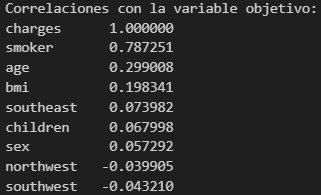<br>
-   Observamos que la variable ``smoker`` es la que posee una correlación mas alta, por lo que es la que más información aporta para la predicción de nuestro modelo.
-   Al igual que ``age`` y ``bmi`` también tiene correlaciones elevadas por lo que favorecen mucho a nuestro modelo.
-   Por otro lado, variables como ``southeast`` y ``children`` y ``sex`` poseen corralaciones bajas por lo que aportan muy poco al modelo.
-   Finalmente, deberiamos eliminar las variables ``northwest`` y ``southwest`` debido a que poseen correlaciones muy bajas.

#### Verificación de la Multicolinealidad con VIF:
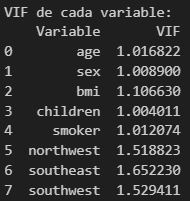 <br><br>
Escala de valores del VIF:
- VIF < 5 → No hay problema de colinealidad.
- VIF entre 5 y 10 → Hay colinealidad moderada, revisar.
- VIF > 10 → Fuerte colinealidad, se recomienda eliminar la variable.

Basándonos en estos resultados podemos apreciar que ninguna de las variables presentan problemas de multicolinealidad.

#### Interpretación de los Coeficiente:
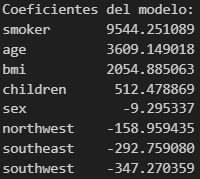
- ``sex`` , ``northwest``, ``southeast`` y ``southwest``: Coeficientes muy bajos, no aportan al modelo.
- ``smoker``, ``age``, ``bmi``: Coeficientes muy altos, indican una gran correlación con la variable objetivo.
- ``children``: Coeficientes algo elevado, aporta muy poco

#### Evaluación del Modelo
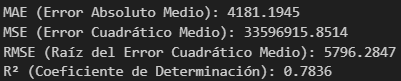
- MAE = 4181.20 → En promedio, el modelo se equivoca en 4181.20 unidades del precio final del seguro.
- MSE = 5796.30 → Penaliza más los errores grandes
- R² = 0.784 → El modelo solo explica el 78.4% de la variabilidad en los precios del seguro.

## Segundo intento
En este caso y basándonos en el análisis anterior, he eliminado las variables ``sex``, ``northwest``, ``southeast`` y ``southwest``. Estas tres últimas pertenecen a la columna ``region``.

In [8]:
# Cargar el CSV en un dataset
df = pd.read_csv("Medical_Cost.csv")

# Análisis del contenido del DataFrame
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [10]:
# Mediante One-Hot encoding convertimos las variables categóricas a variables numéricas eliminando la columna origen en el proceso mediante el parámetro 'drop_first=True'
onehot_smoker = pd.get_dummies(df["smoker"], drop_first=True)

# Sustituimos la columna 'smoker' por el dataframe encodeado ya que solo posee una columna
df["smoker"] = onehot_smoker

# Seleccionar variables independientes (X) y la variable objetivo (y). Aquí nos desacemos de las variables analizadas en el entrenamiento anterior.
X = df.drop(columns=["charges", "region", "sex"])  # Variables predictoras
y = df["charges"]  # Variable objetivo

# Comprobamos el rango de valores de la variable objetivo
print(f"Valor mínimo de charges: {y.min()}")
print(f"Valor máximo de charges: {y.max()}")

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy
print(f"Tamaño de X_scaled: {X_scaled.shape}, Tamaño de y: {y.shape}") # Asegurar que X_scaled y y tienen el mismo número de filas

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["charges"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["charges"].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)

# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto:", modelo.intercept_)
print("Coeficientes del modelo:")
print(coeficientes.sort_values(ascending=False))

# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Valor mínimo de charges: 1121.8739
Valor máximo de charges: 63770.42801
Tamaño de X_scaled: (1338, 4), Tamaño de y: (1338,)
Correlaciones con la variable objetivo:
charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64
VIF de cada variable:
   Variable       VIF
0       age  1.014498
1       bmi  1.012194
2  children  1.001950
3    smoker  1.000745
Intercepto: 13316.407370620895
Coeficientes del modelo:
smoker      9545.091585
age         3610.489616
bmi         1996.547710
children     514.793981
dtype: float64
MAE (Error Absoluto Medio): 4213.7986
MSE (Error Cuadrático Medio): 33981653.9502
RMSE (Raíz del Error Cuadrático Medio): 5829.3785
R² (Coeficiente de Determinación): 0.7811


#### Evaluación del Modelo
- MAE = 4213.80 → En promedio, el modelo se equivoca en 4213.80 unidades del precio final del seguro.
- MSE = 5829.40 → Penaliza más los errores grandes
- R² = 0.781 → El modelo solo explica el 78.1% de la variabilidad en los precios del seguro.

#### Conclusión
Obtenemos resultados muy parecidos a nuestro entrenamiento anterior, siendo el coeficiente de derterminación actual 0.7811 y el anterior 0.7836. <br>
La diferencia crucial es que habiendo eliminado 4 variables de nuestro modelo hemos obtenido practicamente el mismo resultado con una penalización practicamente nula, por lo que esta última opción sería mejor al estar mas optimizada.